
image 1/1 D:\SBI Life Hack-AI-Thon\Document Verfication\Passport\Passport_Front.jpg: 448x640 1 address, 1 code, 1 dob, 1 doi, 1 exp, 1 gender, 1 mrz1, 1 mrz2, 2 names, 1 nation, 1 nationality, 1 poi, 202.1ms
Speed: 8.2ms preprocess, 202.1ms inference, 306.5ms postprocess per image at shape (1, 3, 448, 640)


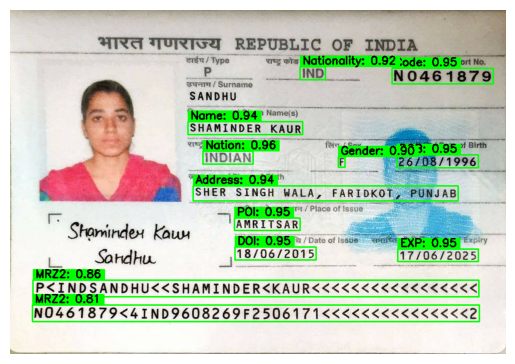

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Define class names for better visualization

CLASS_NAMES = [
    "Address", "Code", "DOB", "DOI", "EXP", 
    "Gender", "MRZ1", "MRZ2", "MRZ2", "Name", 
    "Nationality", "Nation", "POI"
]

# Load your trained YOLO model
model = YOLO("./passport_Annotations.pt")  

# Run inference on an image
results = model("./Passport_Front.jpg")  # Replace with your actual image path

# Process results
filtered_boxes = {}  # Dictionary to store highest-confidence detections per class
output_image = results[0].orig_img.copy()  # Get original image

for result in results:
    for box in result.boxes:
        cls = int(box.cls[0].item())  # Class ID
        conf = box.conf[0].item()  # Confidence score
        xyxy = box.xyxy[0].tolist()  # Bounding box coordinates [x_min, y_min, x_max, y_max]

        # Keep only the highest confidence detection per class
        if cls not in filtered_boxes or conf > filtered_boxes[cls]['conf']:
            filtered_boxes[cls] = {"conf": conf, "xyxy": xyxy, "class_name": CLASS_NAMES[cls]}

# Draw bounding boxes and labels
for cls, data in filtered_boxes.items():
    x_min, y_min, x_max, y_max = map(int, data["xyxy"])
    conf = data["conf"]
    class_name = data["class_name"]

    # Draw rectangle
    cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Create label text
    label = f"{class_name}: {conf:.2f}"

    # Get text size for background
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
    
    # Draw filled rectangle behind text for better visibility
    cv2.rectangle(output_image, (x_min, y_min - text_height - 5), (x_min + text_width + 10, y_min), (0, 255, 0), -1)
    
    # Put text on top of the filled rectangle
    cv2.putText(output_image, label, (x_min + 5, y_min - 5), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()